In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [2]:
def green_region(umin, p0, delta):
    val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(val)
    
    p1g = -1 # No Solution 
    p2g = -1 # No Solution
    MSLg = 100 # No Solution
    MOLg = 100 # No Solution
    
    p1 = cp.Variable()
    p2 = cp.Variable()
    
    constraints = [h_inf + cp.log(1 - p2 + (p0 * p2) - (p0 * p1)) / 0.693 >= umin,
                   (p0 * p1) <= (1 - p2)*(1 - p0) - delta,
                   p2 * (1 - p0) <= p0 * (1 - p1) - delta,
                   0 <= p1,
                   p1 <= 1,
                   0 <= p2,
                   p2 <= 1]
    
    obj = cp.Minimize(1 - p2 + delta + (p0 * p2) - (p0 * p1))
    
    prob = cp.Problem(obj, constraints)
    prob.solve()
    
    if(p1.value != None and p2.value != None):
        p1g = p1.value
        p2g = p2.value
        MSLg1 = h_inf + cp.log(1 - p2g + delta + (p0 * p2g) - (p0 * p1g)) / 0.693
        MSLg = MSLg1.value
        MOLg1 = h_inf + cp.log(1 - p2g + (p0 * p2g) - (p0 * p1g)) / 0.693
        MOLg = MOLg1.value
    
    list_green = [MSLg, MOLg, p1g, p2g] 
    
    return list_green

def cyan_region(umin, p0, delta):
    val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(val)
    
    p1c = -1 # No Solution 
    p2c = -1 # No Solution
    MSLc = 100 # No Solution
    MOLc = 100 # No Solution
    
    
    p1 = cp.Variable()
    p2 = cp.Variable()
    
    constraints = [h_inf + cp.log((p1 * p0) + p2 - (p2 * p0)) / 0.693 >= umin,
                   (p0 * p1) >= (1 - p2)*(1 - p0) + delta,
                   p2 * (1 - p0) >= p0 * (1 - p1) + delta,
                   0 <= p1,
                   p1 <= 1,
                   0 <= p2,
                   p2 <= 1]
    
    obj = cp.Minimize((p1 * p0) + p2 + delta - (p0 * p2))
    
    prob = cp.Problem(obj, constraints)
    prob.solve()
    
    if(p1.value != None and p2.value != None):
        p1c = p1.value
        p2c = p2.value
        MSLc1 = h_inf + cp.log((p1c * p0) + p2c + delta - (p0 * p2c)) / 0.693
        MSLc = MSLc1.value
        MOLc1 = h_inf + cp.log((p1c * p0) + p2c - (p0 * p2c)) / 0.693
        MOLc = MOLc1.value
        
    list_cyan = [MSLc, MOLc, p1c, p2c] 
    
    return list_cyan

def MSL_optimization(p0, delta, umin_list):
    p0_val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(p0_val)
    
    p1valMSL = [100] * len(umin_list)
    p2valMSL = [100] * len(umin_list)
    MSLval_MSL = [100] * len(umin_list)
    MCBval_MSL = [100] * len(umin_list)
    MOLcorrespondval_MSL = [100] * len(umin_list)
    
    for ind in range(len(umin_list)):
        umin = umin_list[ind]
    
        # Green
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLg = 100
        p1g = -1
        p2g = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2(1 - p2 + (p0 * p2) - (p0 * p1)) >= umin
                test2 = (p0 * p1) < (1 - p2) * (1 - p0) - delta
                test3 = p2 * (1 - p0) < p0 * (1 - p1) - delta

                test = test1 and test2 and test3

                if test:                
                    q1 = max(p1 - delta, 0)
                    q2 = max(p2 - delta, 0)

                    MSLg_tmp = h_inf + np.log2(1 - q2 + (p0 * q2) - (p0 * q1))

                    if(MSLg_tmp <= MSLg):
                        MSLg = MSLg_tmp
                        p1g = p1
                        p2g = p2
                        MOLg = h_inf + np.log2(1 - p2g + (p0 * p2g) - (p0 * p1g))

        # Magenta
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLm = 100
        p1m = -1
        p2m = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2(1 - p2 + (p0 * p2) - (p0 * p1)) >= umin
                test2 = (p0 * p1) < (1 - p2) * (1 - p0)
                test3 = (p0 * p1) > (1 - p2) * (1 - p0) - delta
                test4 = p2 * (1 - p0) < p0 * (1 - p1) - delta

                test = test1 and test2 and test3 and test4

                if test:               
                    q1 = max(p1 - delta, 0)
                    q2 = max(p2 - delta, 0)

                    MSLm_tmp = h_inf + np.log2(1 - q2 + (p0 * q2) - (p0 * q1))

                    if(MSLm_tmp <= MSLm):
                        MSLm = MSLm_tmp
                        p1m = p1
                        p2m = p2
                        MOLm = h_inf + np.log2(1 - p2m + (p0 * p2m) - (p0 * p1m))

        # Black
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLb = 100
        p1b = -1
        p2b = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2(1 - p2 + (p0 * p2) - (p0 * p1)) >= umin
                test2 = (p0 * p1) > (1 - p2) * (1 - p0)
                test3 = (p0 * p1) < (1 - p2) * (1 - p0) + delta
                test4 = p2 * (1 - p0) < p0 * (1 - p1) - delta

                test = test1 and test2 and test3 and test4

                if test:
                    q1 = max(p1 - delta, 0)
                    q2 = max(p2 - delta, 0)

                    MSLb_tmp = h_inf + np.log2(1 - q2 + (p0 * q2) - (p0 * q1))

                    if(MSLb_tmp <= MSLb):
                        MSLb = MSLb_tmp
                        p1b = p1
                        p2b = p2
                        MOLb = h_inf + np.log2(1 - p2b + (p0 * p2b) - (p0 * p1b))

        # Yellow
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLy = 100
        p1y = -1
        p2y = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin
                test2 = p0 * (1 - p1) > p2 * (1 - p0)
                test3 = p0 * (1 - p1) < p2 * (1 - p0) + delta
                test4 = p0 * p1 > (1 - p2) * (1 - p0)

                test = test1 and test2 and test3 and test4

                if test:
                    q1 = min(p1 + delta, 1)
                    q2 = min(p2 + delta, 1)

                    MSLy_tmp = h_inf + np.log2((p0 * q1) + q2 - (p0 * q2))

                    if(MSLy_tmp <= MSLy):
                        MSLy = MSLy_tmp
                        p1y = p1
                        p2y = p2
                        MOLy = h_inf + np.log2((p0 * p1y) + p2y - (p0 * p2y))

        # Red
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLr = 100
        p1r = -1
        p2r = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin
                test2 = p0 * p1 > (1 - p2) * (1 - p0) + delta
                test3 = p2 * (1 - p0) > p0 * (1 - p1)
                test4 = p2 * (1 - p0) < p0 * (1 - p1) + delta

                test = test1 and test2 and test3 and test4

                if test:
                    q1 = min(p1 + delta, 1)
                    q2 = min(p2 + delta, 1)

                    MSLr_tmp = h_inf + np.log2((p0 * q1) + q2 - (p0 * q2))

                    if(MSLr_tmp <= MSLr):
                        MSLr = MSLr_tmp
                        p1r = p1
                        p2r = p2
                        MOLr = h_inf + np.log2((p0 * p1r) + p2r - (p0 * p2r))


        # cyan
        p1list = np.arange(0, 1, 0.01)
        p2list = np.arange(0, 1, 0.01)

        MSLc = 100
        p1c = -1
        p2c = -1

        for i in range(len(p1list)):
            for j in range(len(p2list)):
                p1 = p1list[i]
                p2 = p2list[j]

                test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin
                test2 = (p0 * p1) > (1 - p2) * (1 - p0) + delta
                test3 = p2 * (1 - p0) > p0 * (1 - p1) + delta

                test = test1 and test2 and test3

                if test:
                    q1 = min(p1 + delta, 1)
                    q2 = min(p2 + delta, 1)

                    MSLc_tmp = h_inf + np.log2((p0 * q1) + q2 - (p0 * q2))

                    if(MSLc_tmp <= MSLc):
                        MSLc = MSLc_tmp
                        p1c = p1
                        p2c = p2
                        MOLc = h_inf + np.log2((p0 * p1c) + p2c - (p0 * p2c))


        MSLlist = [MSLg, MSLm, MSLb, MSLy, MSLr, MSLc]
        p1vallist = [p1g, p1m, p1b, p1y, p1r, p1c]
        p2vallist = [p2g, p2m, p2b, p2y, p2r, p2c]
        MOLlist_MSL = [MOLg, MOLm, MOLb, MOLy, MOLr, MOLc]

        MSLval_MSL[ind] = min(MSLlist)

        index = MSLlist.index(min(MSLlist))

        p1valMSL[ind] = p1vallist[index]

        p2valMSL[ind] = p2vallist[index]

        MOLcorrespondval_MSL[ind] = MOLlist_MSL[index]
        
        # Green sub-region
        list_green = green_region(umin, p0, delta)
        MSLg = list_green[0]
        MOLg = list_green[1]
        p1g = list_green[2]
        p2g = list_green[3]
        
        # Cyan sub-region            
        list_cyan = cyan_region(umin, p0, delta)
        MSLc = list_cyan[0]
        MOLc = list_cyan[1]
        p1c = list_cyan[2]
        p2c = list_cyan[3]
        
        if(MSLg < MSLc):
            p11valMSL = p1g
            p21valMSL  = p2g
            
        else:
            p11valMSL = p1c
            p21valMSL = p2c

        # Find the corresponding worst-case MCB
        c1 = (p11valMSL * p0) +(1 - p21valMSL) * (1 - p0)
        c2 = p0*(1 - p11valMSL) + (1 - p0) * p21valMSL

        q1tmp1 = max(p11valMSL - delta, 0)
        q2tmp1 = max(p21valMSL - delta, 0)

        term1 = (c1 * p0 * q1tmp1) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * p0 * (1 - q1tmp1)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp1 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * p0 * q1tmp1) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * q2tmp1 * (1 - p0)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp2 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * (1 - p0) * (1 - q2tmp1)) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * p0 * (1 - q1tmp1)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp3 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * (1 - p0) * (1 - q2tmp1)) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * q2tmp1 * (1 - p0)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp4 = h_inf + np.log2(term1 + term2)


        q1tmp2 = min(p11valMSL + delta, 1)
        q2tmp2 = min(p21valMSL + delta, 1)

        term1 = (c1 * p0 * q1tmp2) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * p0 * (1 - q1tmp2)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp5 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * p0 * q1tmp2) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * q2tmp2 * (1 - p0)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp6 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * (1 - p0) * (1 - q2tmp2)) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * p0 * (1 - q1tmp2)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp7 = h_inf + np.log2(term1 + term2)

        term1 = (c1 * (1 - p0) * (1 - q2tmp2)) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * q2tmp2 * (1 - p0)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp8 = h_inf + np.log2(term1 + term2)

        MCBlist = [MCBtmp1, MCBtmp2, MCBtmp3, MCBtmp4, MCBtmp5, MCBtmp6, MCBtmp7, MCBtmp8]
        MCBval_MSL[ind] = max(MCBlist)
    
    return MSLval_MSL, MOLcorrespondval_MSL, MCBval_MSL, p1valMSL, p2valMSL

In [3]:
def MCB_optimization(p0, delta, umin_list):
    p0_val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(p0_val)
    
    p1valMCB = [100] * len(umin_list)
    p2valMCB = [100] * len(umin_list)
    MSLval_MCB = [100] * len(umin_list)
    MCBval_MCB = [100] * len(umin_list)
    MOLcorrespondval_MCB = [100] * len(umin_list)
    
    for i in range(len(umin_list)):
        umin = umin_list[i]

        # Green sub-region
        MCBg = 100
        MOLg = 100

        p1 = np.arange(0, 1, 0.01)
        p2 = np.arange(0, 1, 0.01)

        index = 0

        p1g = -1
        p2g = -1

        while(index < len(p1)):
            index1 = 0

            while(index1 < len(p2)):
                p2first = p2[index1]
                p1first = p1[index]

                q1first = p1first - delta
                q2first = max(p2first - delta, 0) 

                test1 = (p0 * p1first) < ((1 - p2first) * (1 - p0)) - delta
                test2 = (p2first * (1 - p0)) < (p0 * (1 - p1first)) - delta

                testfinal = test1 and test2 

                if testfinal:
                    if((h_inf + np.log2(1 - p2first + (p0 * p2first) - (p0 * p1first))) >= umin):
                    #if((p0 * p1first + ((1 - p0) * p2first)) >= umin):
                        c1 = (p1first * p0) + (1 - p2first) * (1 - p0)
                        c2 = p0 * (1 - p1first) + (1 - p0) * p2first

                        term1 = (c1 * (1 - q2first) * (1 - p0)) / ((q1first * p0) + (1 - p0) * (1 - q2first))
                        term2 = (c2 * p0 * (1 - q1first)) / (p0 * (1 - q1first) + (1 - p0) * q2first)

                        MCBg_new = h_inf + np.log2(term1 + term2)

                        if(MCBg_new < MCBg):
                            MCBg = MCBg_new
                            p1g = p1first
                            p2g = p2first
                            MOLg = h_inf + np.log2(1 - p2g + (p0 * p2g) - (p0 * p1g))

                index1 = index1 + 1

            index = index + 1


        # Cyan sub-region
        MCBc = 100
        MOLc = 100

        p1 = np.arange(0, 1, 0.01)
        p2 = np.arange(0, 1, 0.01)

        index = 0

        p1c = -1
        p2c = -1

        while(index < len(p1)):
            index1 = 0

            while(index1 < len(p2)):
                p2first = p2[index1]
                p1first = p1[index]

                q1first = p1first + delta
                q2first = p2first + delta 

                test1 = (p0 * p1first) > ((1 - p2first) * (1 - p0)) + delta
                test2 = (p2first * (1 - p0)) > (p0 * (1 - p1first)) + delta

                testfinal = test1 and test2 

                if testfinal:
                    if((h_inf + np.log2((p1first * p0) + p2first - (p2first * p0))) >= umin):
                    #if((p0 * p1first + ((1 - p0) * p2first)) >= umin):
                        c1 = (p1first * p0) + (1 - p2first) * (1 - p0)
                        c2 = p0 * (1 - p1first) + (1 - p0) * p2first

                        term1 = (c1 * q1first * p0) / ((q1first * p0) + (1 - p0) * (1 - q2first))
                        term2 = (c2 * (1 - p0) * q2first) / (p0 * (1 - q1first) + (1 - p0) * q2first)

                        MCBc_new = h_inf + np.log2(term1 + term2)

                        if(MCBc_new < MCBc):
                            MCBc = MCBc_new
                            p1c = p1first
                            p2c = p2first
                            MOLc = h_inf + np.log2((p0 * p1c) + p2c - (p0 * p2c))

                index1 = index1 + 1

            index = index + 1

        MCBlist = [MCBg, MCBc]
        MOLlist = [MOLg, MOLc]

        p1list = [p1g, p1c]
        p2list = [p2g, p2c]

        cor_ind = MCBlist.index(min(MCBlist))

        MCBval_MCB[i] = MCBlist[cor_ind]
        MOLcorrespondval_MCB[i] = MOLlist[cor_ind]

        p1valMCB[i] = p1list[cor_ind]

        p2valMCB[i] = p2list[cor_ind]
        
        # Find the corresponding worst-case MSL
        q1first = min(p1valMCB[i] + delta, 1)
        q2first = min(p2valMCB[i] + delta, 1)

        q1second = max(p1valMCB[i] - delta, 0)
        q2second = max(p2valMCB[i] - delta, 0)
        
        MSL1 = h_inf + np.log2((p0 * q1first) + q2first - (p0 * q2first)) 
        MSL2 = h_inf + np.log2(1 - q2first + (p0 * q2first) - (p0 * q1first))
        MSL3 = h_inf + np.log2(1 - q2second + (p0 * q2second) - (p0 * q1second))
        MSL4 = h_inf + np.log2((p0 * q1second) + q2second - (p0 * q2second))
        
        MSL_worst_list = [MSL1, MSL2, MSL3, MSL4]
        MSLval_MCB[i] = max(MSL_worst_list)
        
        
    return MSLval_MCB, MOLcorrespondval_MCB, MCBval_MCB, p1valMCB, p2valMCB

In [4]:
def green_region(umin, p0, delta):
    val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(val)
    
    p1g = -1 # No Solution 
    p2g = -1 # No Solution
    MSLg = 100 # No Solution
    MOLg = 100 # No Solution
    
    p1 = cp.Variable()
    p2 = cp.Variable()
    
    constraints = [h_inf + cp.log(1 - p2 + (p0 * p2) - (p0 * p1)) / 0.693 >= umin,
                   (p0 * p1) <= (1 - p2)*(1 - p0) - delta,
                   p2 * (1 - p0) <= p0 * (1 - p1) - delta,
                   0 <= p1,
                   p1 <= 1,
                   0 <= p2,
                   p2 <= 1]
    
    obj = cp.Minimize(1 - p2 + delta + (p0 * p2) - (p0 * p1))
    
    prob = cp.Problem(obj, constraints)
    prob.solve()
    
    if(p1.value != None and p2.value != None):
        p1g = p1.value
        p2g = p2.value
        MSLg1 = h_inf + cp.log(1 - p2g + delta + (p0 * p2g) - (p0 * p1g)) / 0.693
        MSLg = MSLg1.value
        MOLg1 = h_inf + cp.log(1 - p2g + (p0 * p2g) - (p0 * p1g)) / 0.693
        MOLg = MOLg1.value
    
    list_green = [MSLg, MOLg, p1g, p2g] 
    
    return list_green

def cyan_region(umin, p0, delta):
    val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(val)
    
    p1c = -1 # No Solution 
    p2c = -1 # No Solution
    MSLc = 100 # No Solution
    MOLc = 100 # No Solution
    
    
    p1 = cp.Variable()
    p2 = cp.Variable()
    
    constraints = [h_inf + cp.log((p1 * p0) + p2 - (p2 * p0)) / 0.693 >= umin,
                   (p0 * p1) >= (1 - p2)*(1 - p0) + delta,
                   p2 * (1 - p0) >= p0 * (1 - p1) + delta,
                   0 <= p1,
                   p1 <= 1,
                   0 <= p2,
                   p2 <= 1]
    
    obj = cp.Minimize((p1 * p0) + p2 + delta - (p0 * p2))
    
    prob = cp.Problem(obj, constraints)
    prob.solve()
    
    if(p1.value != None and p2.value != None):
        p1c = p1.value
        p2c = p2.value
        MSLc1 = h_inf + cp.log((p1c * p0) + p2c + delta - (p0 * p2c)) / 0.693
        MSLc = MSLc1.value
        MOLc1 = h_inf + cp.log((p1c * p0) + p2c - (p0 * p2c)) / 0.693
        MOLc = MOLc1.value
        
    list_cyan = [MSLc, MOLc, p1c, p2c] 
    
    return list_cyan

def ML_optimization(p0, delta, umin_list):
    p0_val = np.maximum(p0, 1 - p0)
    h_inf = (-1)*np.log2(p0_val)

    p1valML = [100] * len(umin_list)
    p2valML = [100] * len(umin_list)
    MSLval = [100] * len(umin_list)
    MOLcorrespondingval = [100] * len(umin_list)
    MCBval = [100] * len(umin_list)
    
    for i in range(len(umin_list)):
        umin = umin_list[i]
    
        # Green sub-region
        list_green = green_region(umin, p0, delta)
        MSLg = list_green[0]
        MOLg = list_green[1]
        p1g = list_green[2]
        p2g = list_green[3]


        # Cyan sub-region            
        list_cyan = cyan_region(umin, p0, delta)
        MSLc = list_cyan[0]
        MOLc = list_cyan[1]
        p1c = list_cyan[2]
        p2c = list_cyan[3]

        MOLlist = [MOLg, MOLc]
        
        p1list = [p1g, p1c]
        p2list = [p2g, p2c]

        MLlist = [MOLg, MOLc]

        ind = MLlist.index(min(MLlist))

        MOLcorrespondingval[i] = MOLlist[ind]
        p1valML[i] = p1list[ind]
        p2valML[i] = p2list[ind]

        q1first = min(p1valML[i] + delta, 1)
        q2first = min(p2valML[i] + delta, 1)

        q1second = max(p1valML[i] - delta, 0)
        q2second = max(p2valML[i] - delta, 0)

        MSL1 = h_inf + np.log2((p0 * q1first) + q2first - (p0 * q2first)) 
        MSL2 = h_inf + np.log2(1 - q2first + (p0 * q2first) - (p0 * q1first))
        MSL3 = h_inf + np.log2(1 - q2second + (p0 * q2second) - (p0 * q1second))
        MSL4 = h_inf + np.log2((p0 * q1second) + q2second - (p0 * q2second))
        
        MSL_worst_list = [MSL1, MSL2, MSL3, MSL4]
        MSLval[i] = max(MSL_worst_list)
        
        # Find the corresponding worst-case MCB
        c1 = (p1valML[i] * p0) +(1 - p2valML[i]) * (1 - p0)
        c2 = p0*(1 - p1valML[i]) + (1 - p0) * p2valML[i]
        
        q1tmp1 = max(p1valML[i] - delta, 0)
        q2tmp1 = max(p2valML[i] - delta, 0)
        
        term1 = (c1 * p0 * q1tmp1) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * p0 * (1 - q1tmp1)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp1 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * p0 * q1tmp1) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * q2tmp1 * (1 - p0)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp2 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * (1 - p0) * (1 - q2tmp1)) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * p0 * (1 - q1tmp1)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp3 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * (1 - p0) * (1 - q2tmp1)) / (p0 * q1tmp1 + (1 - p0) * (1 - q2tmp1))
        term2 = (c2 * q2tmp1 * (1 - p0)) / (p0*(1 - q1tmp1) + q2tmp1*(1 - p0))
        MCBtmp4 = h_inf + np.log2(term1 + term2)

        
        q1tmp2 = p1valML[i] + delta
        q2tmp2 = p2valML[i] + delta
        
        term1 = (c1 * p0 * q1tmp2) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * p0 * (1 - q1tmp2)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp5 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * p0 * q1tmp2) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * q2tmp2 * (1 - p0)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp6 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * (1 - p0) * (1 - q2tmp2)) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * p0 * (1 - q1tmp2)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp7 = h_inf + np.log2(term1 + term2)
        
        term1 = (c1 * (1 - p0) * (1 - q2tmp2)) / (p0 * q1tmp2 + (1 - p0) * (1 - q2tmp2))
        term2 = (c2 * q2tmp2 * (1 - p0)) / (p0*(1 - q1tmp2) + q2tmp2*(1 - p0))
        MCBtmp8 = h_inf + np.log2(term1 + term2)
        
        MCBlist = [MCBtmp1, MCBtmp2, MCBtmp3, MCBtmp4, MCBtmp5, MCBtmp6, MCBtmp7, MCBtmp8]
        MCBval[i] = max(MCBlist)
        

    return MSLval, MOLcorrespondingval, MCBval, p1valML, p2valML

In [5]:
p0 = 0.6
delta = 0.05
umin_list = np.linspace(0,0.6,40)

# MSL Optimization
MSL1, MOLcor1, MCB1, p1list1, p2list1 = MSL_optimization(p0, delta, umin_list)

# MCB Optimization
MSL2, MOLcor2, MCB2, p1list2, p2list2 = MCB_optimization(p0, delta, umin_list)

# ML Optimization
MSL3, MOLcor3, MCB3, p1list3, p2list3 = ML_optimization(p0, delta, umin_list)

<ipython-input-2-0dedda799375>:197: RuntimeWarning: divide by zero encountered in log2
  test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin
<ipython-input-2-0dedda799375>:229: RuntimeWarning: divide by zero encountered in log2
  test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin
<ipython-input-2-0dedda799375>:262: RuntimeWarning: divide by zero encountered in log2
  test1 = h_inf + np.log2((p0 * p1) + p2 - (p0 * p2)) >= umin


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

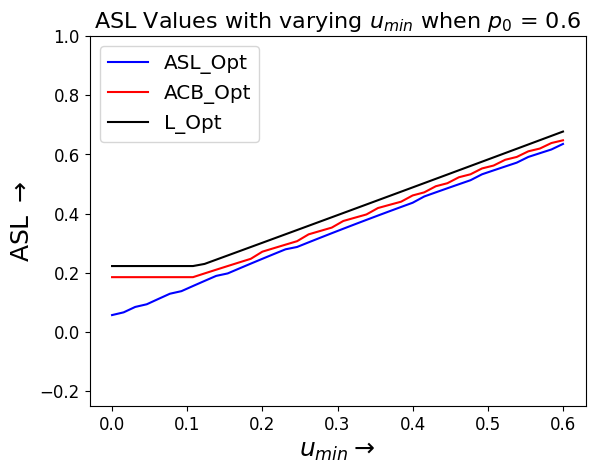

In [6]:
from google.colab import files

plt.figure(0)    
plt.plot(umin_list, MSL1, 'b-', label='MSL_Optimization')
plt.plot(umin_list, MSL2, 'r-', label='MCB_Optimization')
plt.plot(umin_list, MSL3, 'k-', label='ML_Optimization')

plt.ylim([-0.25, 1])

plt.legend(['ASL_Opt', 'ACB_Opt', 'L_Opt'], loc = 'upper left', fontsize = 'x-large')
plt.title('ASL Values with varying $u_{min}$ when $p_0$ = 0.6', fontsize = 16)
plt.xlabel(r'$u_{min} \rightarrow$', fontsize = 18)
plt.ylabel(r'ASL $\rightarrow$', fontsize = 18)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('MSL_values_case_2_again.png')
files.download('MSL_values_case_2_again.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

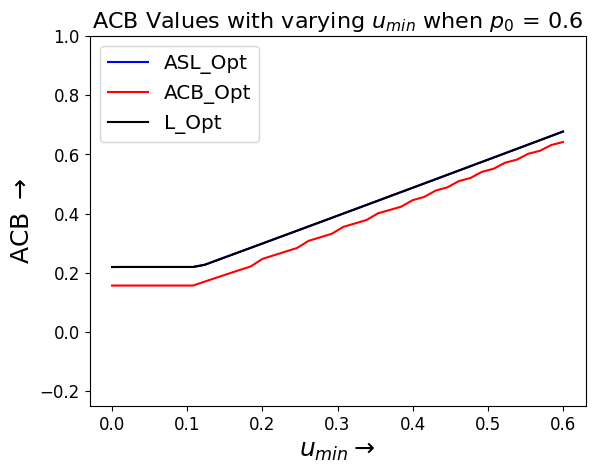

In [7]:
plt.figure(1)    
plt.plot(umin_list, MCB1, 'b-', label='MSL_Optimization')
plt.plot(umin_list, MCB2, 'r-', label='MCB_Optimization')
plt.plot(umin_list, MCB3, 'k-', label='ML_Optimization')

plt.ylim([-0.25, 1])

plt.legend(['ASL_Opt', 'ACB_Opt', 'L_Opt'], loc = 'upper left', fontsize = 'x-large')
plt.title('ACB Values with varying $u_{min}$ when $p_0$ = 0.6', fontsize = 16)
plt.xlabel(r'$u_{min} \rightarrow$', fontsize = 18)
plt.ylabel(r'ACB $\rightarrow$', fontsize = 18)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('MCB_values_case_2_again.png')
files.download('MCB_values_case_2_again.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

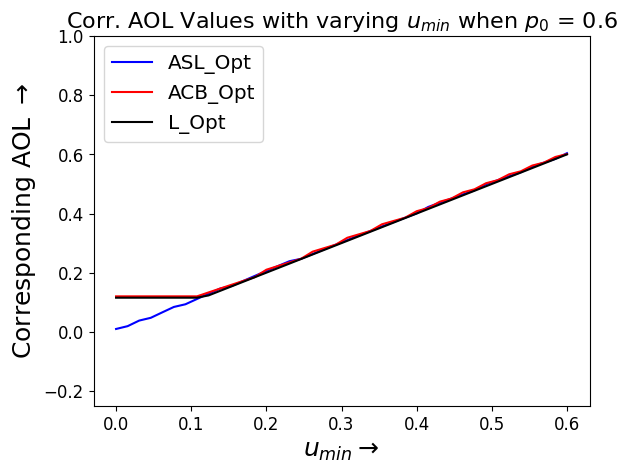

In [9]:
plt.figure(2)    
plt.plot(umin_list, MOLcor1, 'b-', label='MSL_Optimization')
plt.plot(umin_list, MOLcor2, 'r-', label='MCB_Optimization')
plt.plot(umin_list, MOLcor3, 'k-', label='ML_Optimization')

plt.ylim([-0.25, 1])

plt.legend(['ASL_Opt', 'ACB_Opt', 'L_Opt'], loc = 'upper left', fontsize = 'x-large')
plt.title('Corr. AOL Values with varying $u_{min}$ when $p_0$ = 0.6', fontsize = 16)
plt.xlabel(r'$u_{min} \rightarrow$', fontsize = 18)
plt.ylabel(r'Corresponding AOL $\rightarrow$', fontsize = 18)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('MOL_values_case_2_again.png')
files.download('MOL_values_case_2_again.png')